In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datascience_jobs.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [4]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [5]:
def columnstodrop(df):
    rowstodrop=[]
    
    for column in df.columns:
        if df[column].isnull().mean() <0.05 and df[column].isnull().mean() >0:
            rowstodrop.append(column)
            
    return rowstodrop

In [6]:
columnstodrop(df)


['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [7]:
def columnsWithMissingValues(df):
    rowstodrop=[]
    cols=pd.DataFrame()
    for column in df.columns:
        if df[column].isnull().mean() <0.05 and df[column].isnull().mean() >0:
            cols[column] = df[column]
            
    return cols

In [8]:
cols=columnsWithMissingValues(df)
cols.shape

(19158, 5)

In [28]:
cols.sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
9885,0.624,Full time course,Graduate,6.0,34.0
8476,0.920,Full time course,Graduate,7.0,68.0
581,0.802,Full time course,Graduate,8.0,4.0
11412,0.689,no_enrollment,High School,8.0,102.0
9367,0.827,no_enrollment,Masters,7.0,16.0


In [9]:
#identify how many percentage of data will be left after dropping the missing columns
len(cols.dropna())/len(cols)

0.8968577095730244

In [10]:
cols=cols.dropna()
cols.shape

(17182, 5)

In [13]:
def concatenate_dataframes(df1, df2):
    common_columns = df1.columns.intersection(df2.columns)  # Get the common columns between df1 and df2
    new_columns = df2.columns.difference(df1.columns)  # Get the columns in df2 that are not present in df1

    # Select only the new columns from df2 and concatenate the DataFrames
    new_df = pd.concat([df2[new_columns], df1[common_columns]], axis=1)
    # Drop rows in new_df where the index is not present in df1
    new_df = new_df.loc[df2.index.isin(df1.index)]
    return new_df

In [14]:
new_df=concatenate_dataframes(cols,df)

new_df.shape

(17182, 13)

In [18]:
new_df

,city,company_size,company_type,enrollee_id,gender,major_discipline,relevent_experience,target,city_development_index,enrolled_university,education_level,experience,training_hours
0,city_103,NaN,NaN,8949,Male,STEM,Has relevent experience,1.0,0.920,no_enrollment,Graduate,20.0,36.0
1,city_40,50-99,Pvt Ltd,29725,Male,STEM,No relevent experience,0.0,0.776,no_enrollment,Graduate,15.0,47.0
2,city_21,NaN,NaN,11561,NaN,STEM,No relevent experience,0.0,0.624,Full time course,Graduate,5.0,83.0
4,city_162,50-99,Funded Startup,666,Male,STEM,Has relevent experience,0.0,0.767,no_enrollment,Masters,20.0,8.0
5,city_176,NaN,NaN,21651,NaN,STEM,Has relevent experience,1.0,0.764,Part time course,Graduate,11.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,city_173,NaN,NaN,7386,Male,Humanities,No relevent experience,1.0,0.878,no_enrollment,Graduate,14.0,42.0
19154,city_103,NaN,NaN,31398,Male,STEM,Has relevent experience,1.0,0.920,no_enrollment,Graduate,14.0,52.0
19155,city_103,50-99,Pvt Ltd,24576,Male,STEM,Has relevent experience,0.0,0.920,no_enrollment,Graduate,20.0,44.0
19156,city_65,500-999,Pvt Ltd,5756,Male,NaN,Has relevent experience,0.0,0.802,no_enrollment,High School,0.0,97.0


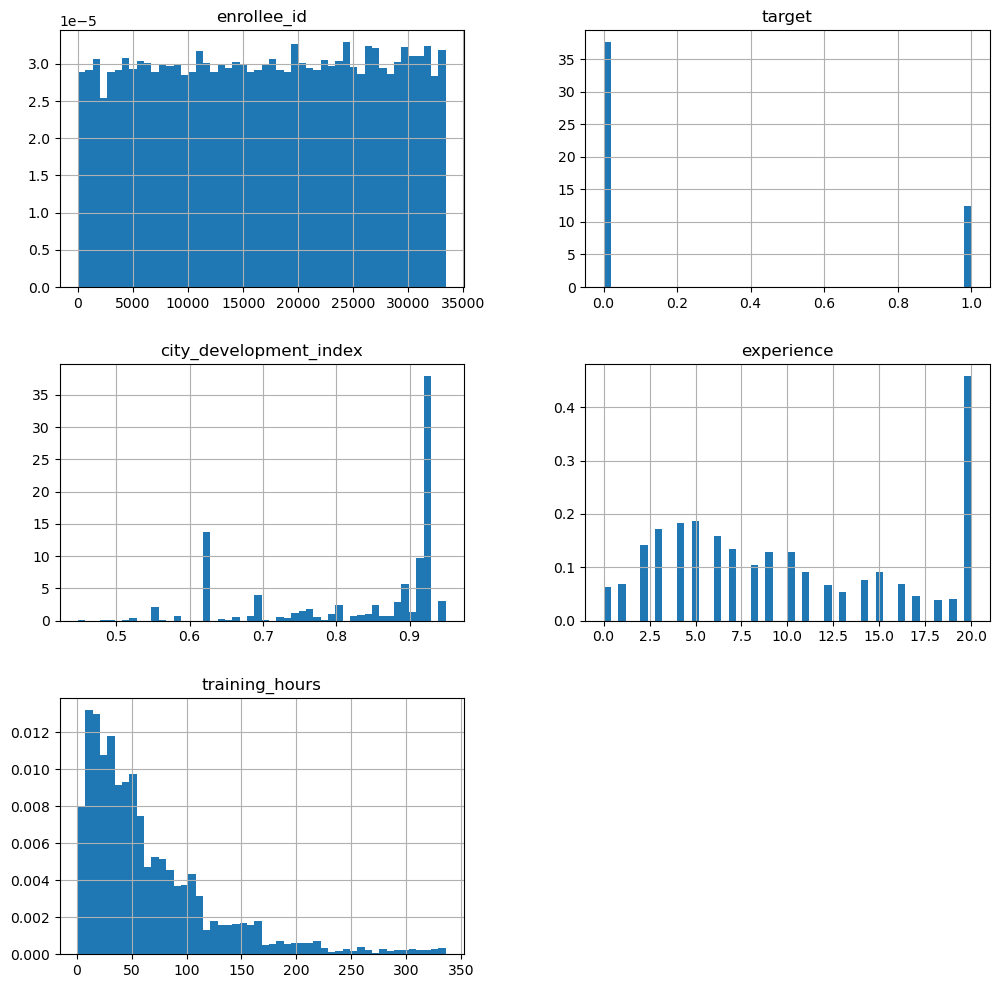

In [17]:
new_df.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

<AxesSubplot:>

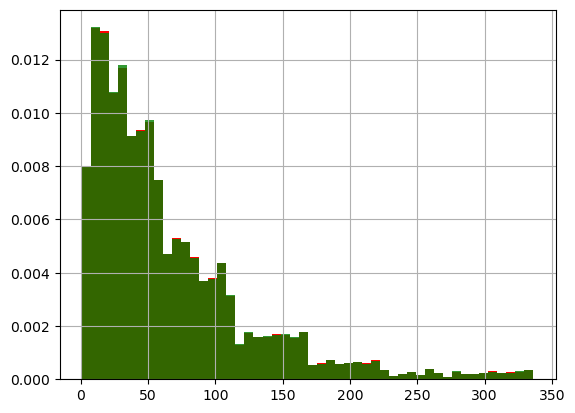

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

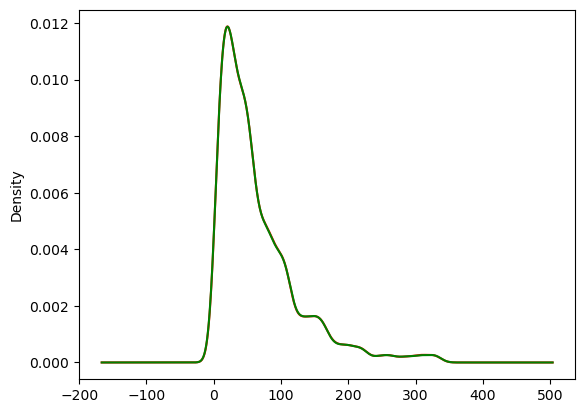

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='green')

<AxesSubplot:>

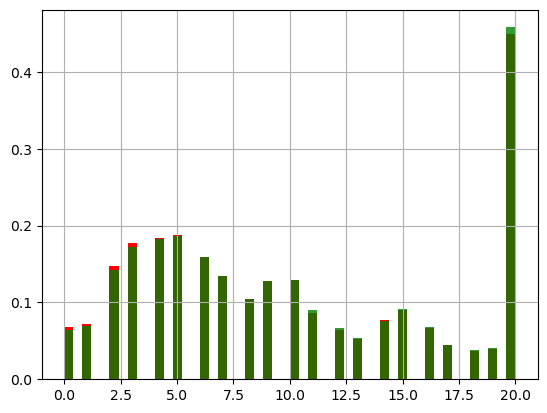

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

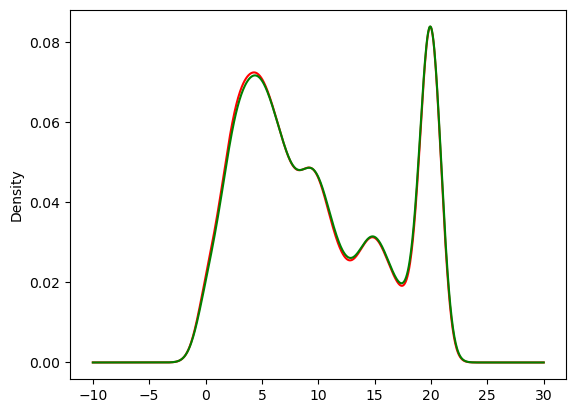

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# data after cca
new_df['experience'].plot.density(color='green')

<AxesSubplot:>

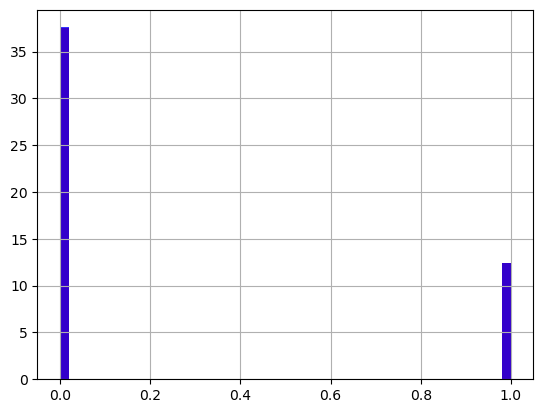

In [24]:
fig= plt.figure()
ax = fig.add_subplot(111)
# original data
df['target'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['target'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

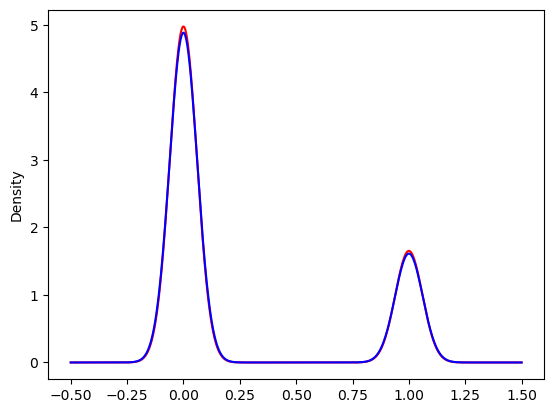

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['target'].plot.density(color='red')

# data after cca
new_df['target'].plot.density(color='blue')

In [27]:
# Categorical columns

temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [33]:
temp_Edu = pd.concat([
                df['education_level'].value_counts()/ len(df),
    
                new_df['education_level'].value_counts() / len(new_df)
            ],
            axis=1)
                       
temp_Edu.columns = ['original', 'cca']

temp_Edu

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
